<a href="https://colab.research.google.com/github/Didier06/IA_FABLAB/blob/main/Digit_recognition-opencv/cnn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vérification version de keras**

In [1]:
!git clone https://github.com/Didier06/IA_FABLAB


Cloning into 'IA_FABLAB'...
remote: Enumerating objects: 266, done.
remote: Counting objects: 100% (182/182), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 266 (delta 64), reused 113 (delta 37), pack-reused 84 (from 1)
Receiving objects: 100% (266/266), 28.76 MiB | 22.23 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [2]:
import keras
keras.__version__

'3.8.0'

# Un premier réseau de convolution avec Keras

On utilise les couches `Conv2D` et `MaxPooling2D`.

Remarque imortante : le tenseur d'entrée du réseau de convolution avec keras doit avoir les dimensions suivantes : `(hauteur image, largeur  image, canal de l'image)`
Dans notre cas : `(28, 28, 1)`, format des images MNIST.  
Pour réaliser cette opération exécuter cette commande :  
`input_shape=(28, 28, 1)`.

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Affichons la structure du réseau :

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

Les sorties des couches `Conv2D` et `MaxPooling2D` sont des tenseurs 3D avec les dimensions `(hauteur, largeur, canaux)`.
Le nombre de canaux est fixé par le 1er argument des couches  `Conv2D` (32 ou 64).

Dans l'étape suivante on aplati (Flatten) la couche 3D en une couche 1D puis on retrouve 2 couches "dense".
Avec pour la dernière une activaztion 'softmax'


In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Nous avons réalisé une classification avec 10 sorties.  
Voici le modèle complet avec 93332 paramètres :

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Le tenseur `(3, 3, 64)` est transformé en tenseur 1D de dimension `(576,)`, avant la classification avec les 2 couches 'Dense'  

Entrainons le réseau de convolution :

In [7]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 53ms/step - accuracy: 0.8707 - loss: 0.4053
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9843 - loss: 0.0498
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9909 - loss: 0.0298
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.9925 - loss: 0.0242
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.9945 - loss: 0.0180


Evaluons le modèle sur les données de test :

In [10]:
model.save('/content/IA_FABLAB/Digit_recognition-opencv/model.keras')

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9883 - loss: 0.0383


In [12]:
test_acc

0.9907000064849854

Le résultat est très satisfaisant .... est meilleur que celui obtenu avec le réseau dense.

**Prédictions avec une image dessinée sur paint.**

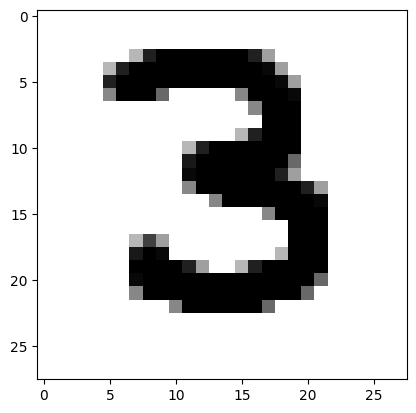

In [13]:
# reading png image file
import matplotlib.pyplot as plt
import matplotlib.image as img
im = img.imread('/content/IA_FABLAB/Digit_recognition-opencv/images/digit_3.png')
plt.imshow(im, cmap=plt.cm.binary)
#print(im.shape)
#print(img.shape)

**Préparation de l'image dessinée et prédiction**

In [14]:
from PIL import Image, ImageOps
import numpy as np
def preprocess_image(image_path):# préparation de l'image
    img = Image.open(image_path).convert('L')  # Convertir en niveau de gris grayscale
    img = ImageOps.invert(img)                 # inverse l'image pour qu'elle soit conforme aux images MNIST
    img = img.resize((28, 28))                 # Redimensionnement à 28x28
    img = np.array(img)                        # Convertir en tableau numpy
    img = img / 255.0                          # on normalise les valeurs des pixels
    img = img.reshape(1,28,28)                 # redimensionne en  (28,28) ( entrée du réseau cnn
    return img

processed_image = preprocess_image('/content/IA_FABLAB/Digit_recognition-opencv/images/digit_3.png')

predictions= model.predict(processed_image)# prévision

print(predictions.round(2)) # résultat
print("Chiffre prédit : ", predictions.argmax())# index  of the class with highest probability


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Chiffre prédit :  3
